# Labb2 uppgiter: klassificera

Datum: 2021-9-16

I den här laborationen finns (simulerad) data på Pichus och Pikachus längder och bredder. Du
ska skapa en algoritm som baserat på den givna datan kunna avgöra om en ny data ska
klassificeras som Pichu eller Pikachu.

## 1. read data and save in a right data structure, and plot in the same figure.


No handles with labels found to put in legend.


50
50
100


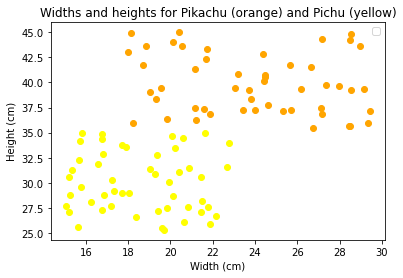

In [2]:
import matplotlib.pyplot as plt

path_pikachu = "pikachu.txt"
path_pichu = "pichu.txt"

with open (path_pikachu, "r") as data_pikachu, open(path_pichu, "r") as data_pichu:
    
    # for each line reading from the txt file, line.strip("\n") removes the ending "\n".
    # thereafter remove the left and right brackets, through .replace("(", "") and .replace(")", "") respectively.
    # thereafter split each line by comma: .split(", ")
    # Now I cleaned the data and get 50 lines of width and height in the form of strings: width height    
    df_pikachu = data_pikachu.readlines()[1:] #[1:]: reading all lines from txt file and remove header
    df_pichu = data_pichu.readlines()[1:] #[1:]: reading all lines from txt file and remove header
    pikachu_list = [line.strip("\n").replace("(", "").replace(")", "").split(", ") for line in df_pikachu]
    pichu_list = [line.strip("\n").replace("(", "").replace(")", "").split(", ") for line in df_pichu]
 

    # Nested list is used here.
    # I create a list for 50 points, where each point contains a list of three elements:
    # the first element is the width of this point, changed from str to float
    # the second element is the heigt of this point, changed from str to float
    # the third element is a string which tells this point is pikachu or pichu
    
    pikachu = [[float(one_pikachu[0]), float(one_pikachu[1]), "pikachu"] for one_pikachu in pikachu_list ]
    pichu = [[float(one_pichu[0]), float(one_pichu[1]), "pichu"] for one_pichu in pichu_list ]

    # combine the pikachu list and pichu list to a list of totall points
    # this makes selecting five nearest points much easier, 
    # than selecting seperately from pikachu and pichu lists and then compare among ten points. 
    pikachu_pichu= pikachu + pichu

    # check length of each list to ensure I did not lose data.
    print(len(pikachu))
    print(len(pichu))
    print(len(pikachu_pichu))

    # To plot, I need the list of x and the list of y for pikachu or pichu list
    x_pikachu = [point[0] for point in pikachu]
    y_pikachu = [point[1] for point in pikachu]
    x_pichu = [point[0] for point in pichu]
    y_pichu = [point[1] for point in pichu]

    # I tried with zip method: to map the similar index of multiple containers so that they can be used just using as single entity
    """ type_pikachu = ["pikachu" for _ in range(100)]
    ziped_pikachu = zip(x_pikachu, y_pikachu, type_pikachu)
    print(list(ziped_pikachu)) """
    # Then I decided to drop this method, because it generates tuples in  a list
    # These tuple objects later on could not support item assignment.
 
    #Plot all points with different colors in one figure
    plt.scatter(x_pikachu, y_pikachu, c="orange")
    plt.scatter(x_pichu, y_pichu, c="yellow")
    plt.ylabel("Height (cm)")
    plt.xlabel("Width (cm)") 
    plt.title("Widths and heights for Pikachu (orange) and Pichu (yellow)")   
    plt.legend()
    plt.show()


## read in, clean and save test data

['(25, 35', ' (15,14', ' (26,30', ' (22,45)']
['25, 35', '15,14', '26,30', '22,45']
[['25', ' 35'], ['15', '14'], ['26', '30'], ['22', '45']]
4
[25, 15, 26, 22]
[35, 14, 30, 45]


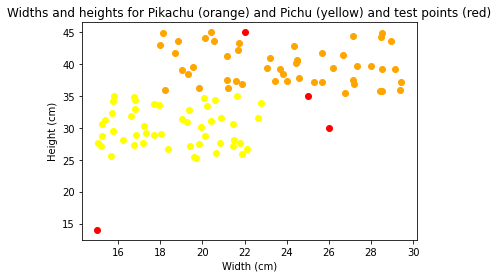

In [3]:
with open ("test_points.txt", "r") as data_test:

    # for each line reading from the txt file
    # It is one str in a list, I split it by split("),") to four strings.
    test_points_raw = data_test.readlines()[0].split("),")
    print(test_points_raw)
    
    # thereafter remove the left and right brackets in each string
    test_points_striped = [each_point.strip("( )") for each_point in test_points_raw]
    print(test_points_striped)

    # thereafter split each string by comma: .split(", ")    
    test_points_split = [point.split(",") for point in test_points_striped]
    print(test_points_split)

    # first change element type from str to int
    # then save these into a nested list called: test_points
    # for each element in test_points list, there is a list with three elements:
    # the first element is the width of this point, changed from str to float
    # the second element is the heigt of this point, changed from str to float
    # the third element is a string which tells this point is pikachu or pichu
    test_points = [[int(test_point_split[0]), int(test_point_split[-1]), "test_point"] for test_point_split in test_points_split]
    
    # ensure I did not miss any test point
    print(len(test_points))
    
    # get x-axis value list of all points
    x_test = [point[0] for point in test_points]
    print(x_test)

    # get y-axis value list of all points
    y_test = [point[1] for point in test_points]
    print(y_test)

    #Plot all points with different colors in one figure
    plt.scatter(x_pikachu, y_pikachu, c="orange")
    plt.scatter(x_pichu, y_pichu, c="yellow")
    plt.scatter(x_test, y_test, c="red")
    plt.ylabel("Height (cm)")
    plt.xlabel("Width (cm)") 
    plt.title("Widths and heights for Pikachu (orange) and Pichu (yellow) and test points (red)")   
    plt.show()


## Calculate the distance between the test points and all other points.

In [4]:
def euclidean_distance(x1,y1,x2,y2):
    return (((x1-x2)**2+(y1-y2)**2)**0.5)


#test_points, in type of list, is the test points that I am going to decide wether it is pikachu or pichu
#pikachu_pichu: a list of training data
#n_of_nearest_points: how many nearest points are used to decide whether it is pikachu or pichu
def find_pikachu_or_pichu(test_points, pikachu_pichu, n_of_nearest_points):

    for test_point in test_points:

        distance_type = []
        for i in range(0,len(pikachu_pichu)): 
            eu_distance = euclidean_distance(test_point[0], test_point[1], pikachu_pichu[i][0], pikachu_pichu[i][1])
            test_type = pikachu_pichu[i][2]     
            test_points_distance = [eu_distance, test_type]
    
            distance_type.append(test_points_distance)
        distance_type.sort()
        distance_type_list = distance_type[0:n_of_nearest_points]

        if n_of_nearest_points == 1:
            print(f"The {test_point} according to {n_of_nearest_points} nearest point metohd: is {distance_type_list[0][1]}.")

        else:
            count_pikachu = distance_type_list[:][1].count("pikachu")
            count_pichu = distance_type_list[:][1].count("pichu")

            if count_pikachu > count_pichu:
                print(f"The {test_point} according to {n_of_nearest_points} nearest points metohd: is pikachu.")
            else:
                print(f"The {test_point} according to {n_of_nearest_points} nearest points metohd: is pichu.")

## 0.  klassificerat testdatan 

In [5]:
find_pikachu_or_pichu(test_points, pikachu_pichu, 1)

The [25, 35, 'test_point'] according to 1 nearest point metohd: is pikachu.
The [15, 14, 'test_point'] according to 1 nearest point metohd: is pichu.
The [26, 30, 'test_point'] according to 1 nearest point metohd: is pichu.
The [22, 45, 'test_point'] according to 1 nearest point metohd: is pikachu.


## 1. User input data to decide

Låt användaren mata in en testpunkt och avgör om den dess klass. Ta med felhanteringen
som tar hand om negativa tal och icke-numeriska inputs. Se till att ha användarvänliga
felmeddelanden.


In [7]:
# let the user input width and height to decide if this point is pikachu or pichu

# input width and error handling
while True:
    width_user = input("Please input a non-negative width")
    try:
        width_user = float(width_user)
        if width_user <= 0:
            raise ValueError(f"width should be non-negative number, inte {width_user}. please input again.")
        break
    except ValueError as err:
        print(err)


# input height and error handling
while True:
    height_user = input("Please input a non-negative height")
    try:
        height_user = float(height_user)
        if height_user <= 0:
            raise ValueError(f"height should be non-negative number, inte {height_user}. please input again.")
        break
    except ValueError as err:
        print(err)


# input the method to make decision and error handling
while True:
    n_nearest_user = input("Please choose algorithm: how many nearest points are you using to make decision?")
    try:
        n_nearest_user = int(n_nearest_user)
        if n_nearest_user <= 0:
            raise ValueError(f"The number of nearest points should be at least one, not {n_nearest_user}")
        break
    except ValueError as err:
        print(err)

test_point_user = [[width_user, height_user]]
find_pikachu_or_pichu(test_point_user, pikachu_pichu, n_nearest_user)


width should be non-negative number, inte -20.0. please input again.
could not convert string to float: 'rr'
height should be non-negative number, inte -30.0. please input again.
could not convert string to float: 'gg'
The number of nearest points should be at least one, not 0
invalid literal for int() with base 10: 'rr'
The [20.0, 30.0] according to 5 nearest points metohd: is pichu.


## 2. Change algorithm

Den approachen vi använt med närmaste punkten kan klassificera fel när punkterna för
respektive klass går in i varandra. Nu ska du istället välja de fem närmaste punkterna till din
testpunkt. Den klass testpunkten tillhör avgörs av majoritetsklassen av de närmaste
punkterna.


In [8]:
find_pikachu_or_pichu(test_points, pikachu_pichu, 5)

The [25, 35, 'test_point'] according to 5 nearest points metohd: is pikachu.
The [15, 14, 'test_point'] according to 5 nearest points metohd: is pichu.
The [26, 30, 'test_point'] according to 5 nearest points metohd: is pichu.
The [22, 45, 'test_point'] according to 5 nearest points metohd: is pikachu.
